In [ ]:
import numpy as np
import time
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W

from clusteval import clusteval

import warnings
warnings.filterwarnings('ignore')

In [ ]:
start_time = time.time()
scaler = StandardScaler()

Data_train = pd.read_csv('AppML_InitialProject_test_clustering.csv')

Data_train = pd.DataFrame(scaler.fit_transform(Data_train), columns=Data_train.columns)

X = Data_train

# Find the most important features using the **Laplacian score**

In [ ]:
###Laplacian performs better than variance in detecting the most important features###
kwargs_W = {"metric": "euclidean", "neighbor_mode": "knn", "weight_mode": "heat_kernel", "k": 5, 't': 1}
W = construct_W.construct_W(X.to_numpy(), **kwargs_W)

laplacian_scores = lap_score.lap_score(X.to_numpy(), W=W)

sorted_indices = np.argsort(laplacian_scores)

top_10_features = Data_train.columns[sorted_indices[:10]].tolist()

print("Top 10 Features based on Laplacian Score:")
print(top_10_features)

X_10 = X[top_10_features]

Top 10 Features based on Laplacian Score:
['pX_E5x7_Lr1', 'pX_ptvarcone40', 'pX_topoetcone20ptCorrection', 'pX_E_Lr2_LowG', 'pX_emins1', 'pX_nCells_Lr1_LowG', 'pX_deltaEta0', 'pX_deltaPhi2', 'pX_etcone30', 'pX_nCells_Lr1_HiG']


# Unsupervised clustering using the **Agglomerative** method and using the **elbow method** to find the optimal number of clusters

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate clustering using [derivatives] method
[clusteval] >INFO> Clusters: 5
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [5].
[clusteval] >INFO> Fin.


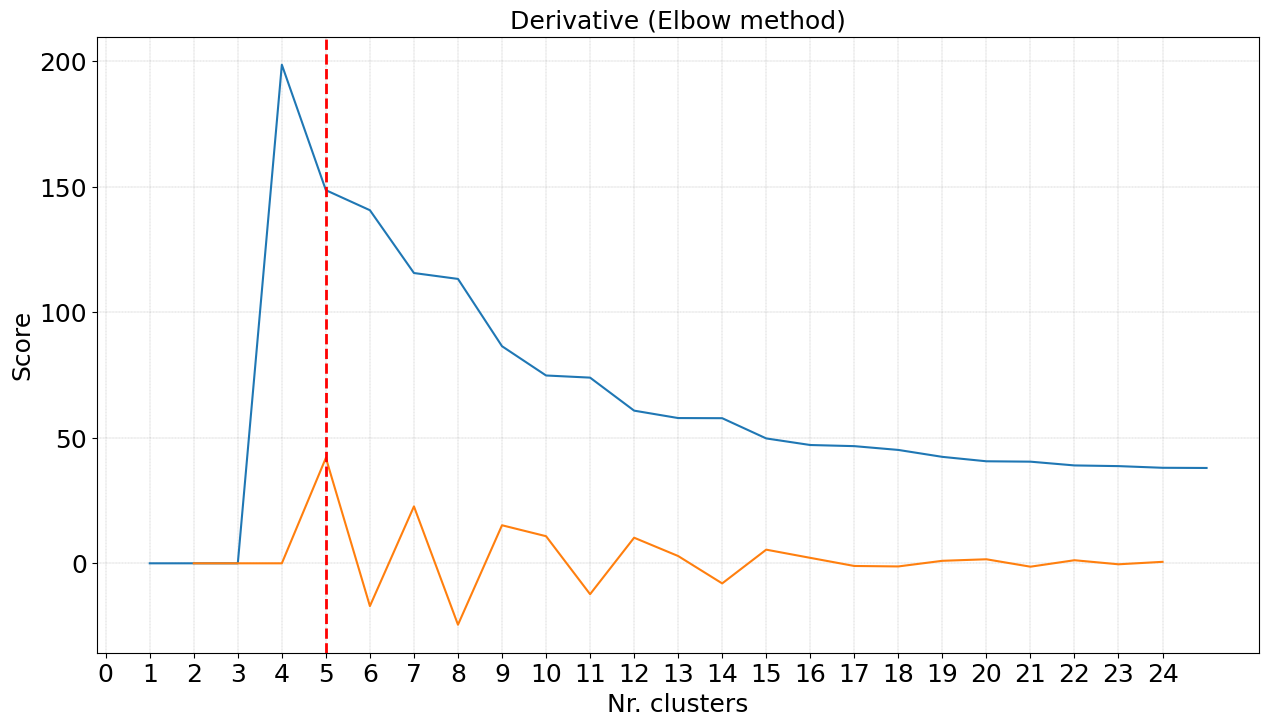

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'Derivative (Elbow method)'}, xlabel='Nr. clusters', ylabel='Score'>)

In [37]:
from clusteval import clusteval

ce = clusteval(cluster = 'agglomerative', evaluate = 'derivative', min_clust = 3, max_clust=25, linkage = 'ward')
results = ce.fit(X_10)

labels_list = list(results['labx'] - 1) 

# Plot
ce.plot()

In [38]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 62.25913619995117 seconds


# Saving (set to False)

In [ ]:
folder_name = 'solutions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Write = False
if Write:
    variables = top_10_features
    csv_file_path = os.path.join(folder_name, 'Clustering_Agglomerative_VariableList.csv')
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for variable in variables:
            writer.writerow([variable])
    
    data = results['labx'].astype(float)
    csv_file_path = os.path.join(folder_name, 'Clustering_Agglomerative.csv')
    
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for index, item in enumerate(data, start=0):
            writer.writerow([index, item])